In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
artworks_df = pd.read_csv('../01_artwork_clustering/omniart-post-artwork-clustering.csv')

In [3]:
centroids_df = pd.read_csv('../01_artwork_clustering/artwork-centroids.csv')

**1. Features**

In [4]:
artworks_df['cluster'] = 'cluster_' + artworks_df['cluster'].astype(str)

In [5]:
merged_df = pd.merge(artworks_df, centroids_df, left_on='cluster', right_on='name', how='left')

In [6]:
feature_columns = [col for col in centroids_df.columns if col != 'name']

In [7]:
data = merged_df[
    merged_df['decade'].notna()
].dropna(subset=feature_columns)

In [8]:
counts = data['decade'].value_counts()
decades_to_keep = counts[counts >= 2].index
data_filtered = data[data['decade'].isin(decades_to_keep)].copy()

In [9]:
X = data_filtered[feature_columns]

**2. Labels**

In [10]:
y = data_filtered['decade']

**3. Split dataset**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**4. Classify**

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [13]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = clf.predict(X_test)

**5. Evaluate**

In [15]:
print("Decade Classifier Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Decade Classifier Accuracy: 52.45%


In [16]:
print(classification_report(y_test, y_pred, labels=y.unique(), zero_division=0))


              precision    recall  f1-score   support

        2000       0.00      0.00      0.00     13842
        1360       0.00      0.00      0.00       102
        1750       0.00      0.00      0.00       301
        2010       0.52      1.00      0.69     41573
        1640       0.00      0.00      0.00       408
        1720       0.00      0.00      0.00       240
        1730       0.00      0.00      0.00       151
        1460       0.00      0.00      0.00       245
        1870       0.00      0.00      0.00       790
        1440       0.00      0.00      0.00       200
        1470       0.00      0.00      0.00       339
        1830       0.00      0.00      0.00       246
        1540       0.00      0.00      0.00       156
        1670       0.00      0.00      0.00       394
        1790       0.00      0.00      0.00       372
        1740       0.00      0.00      0.00       163
        1550       0.00      0.00      0.00       244
        1560       0.00    

**4.1. Confusion matrix**

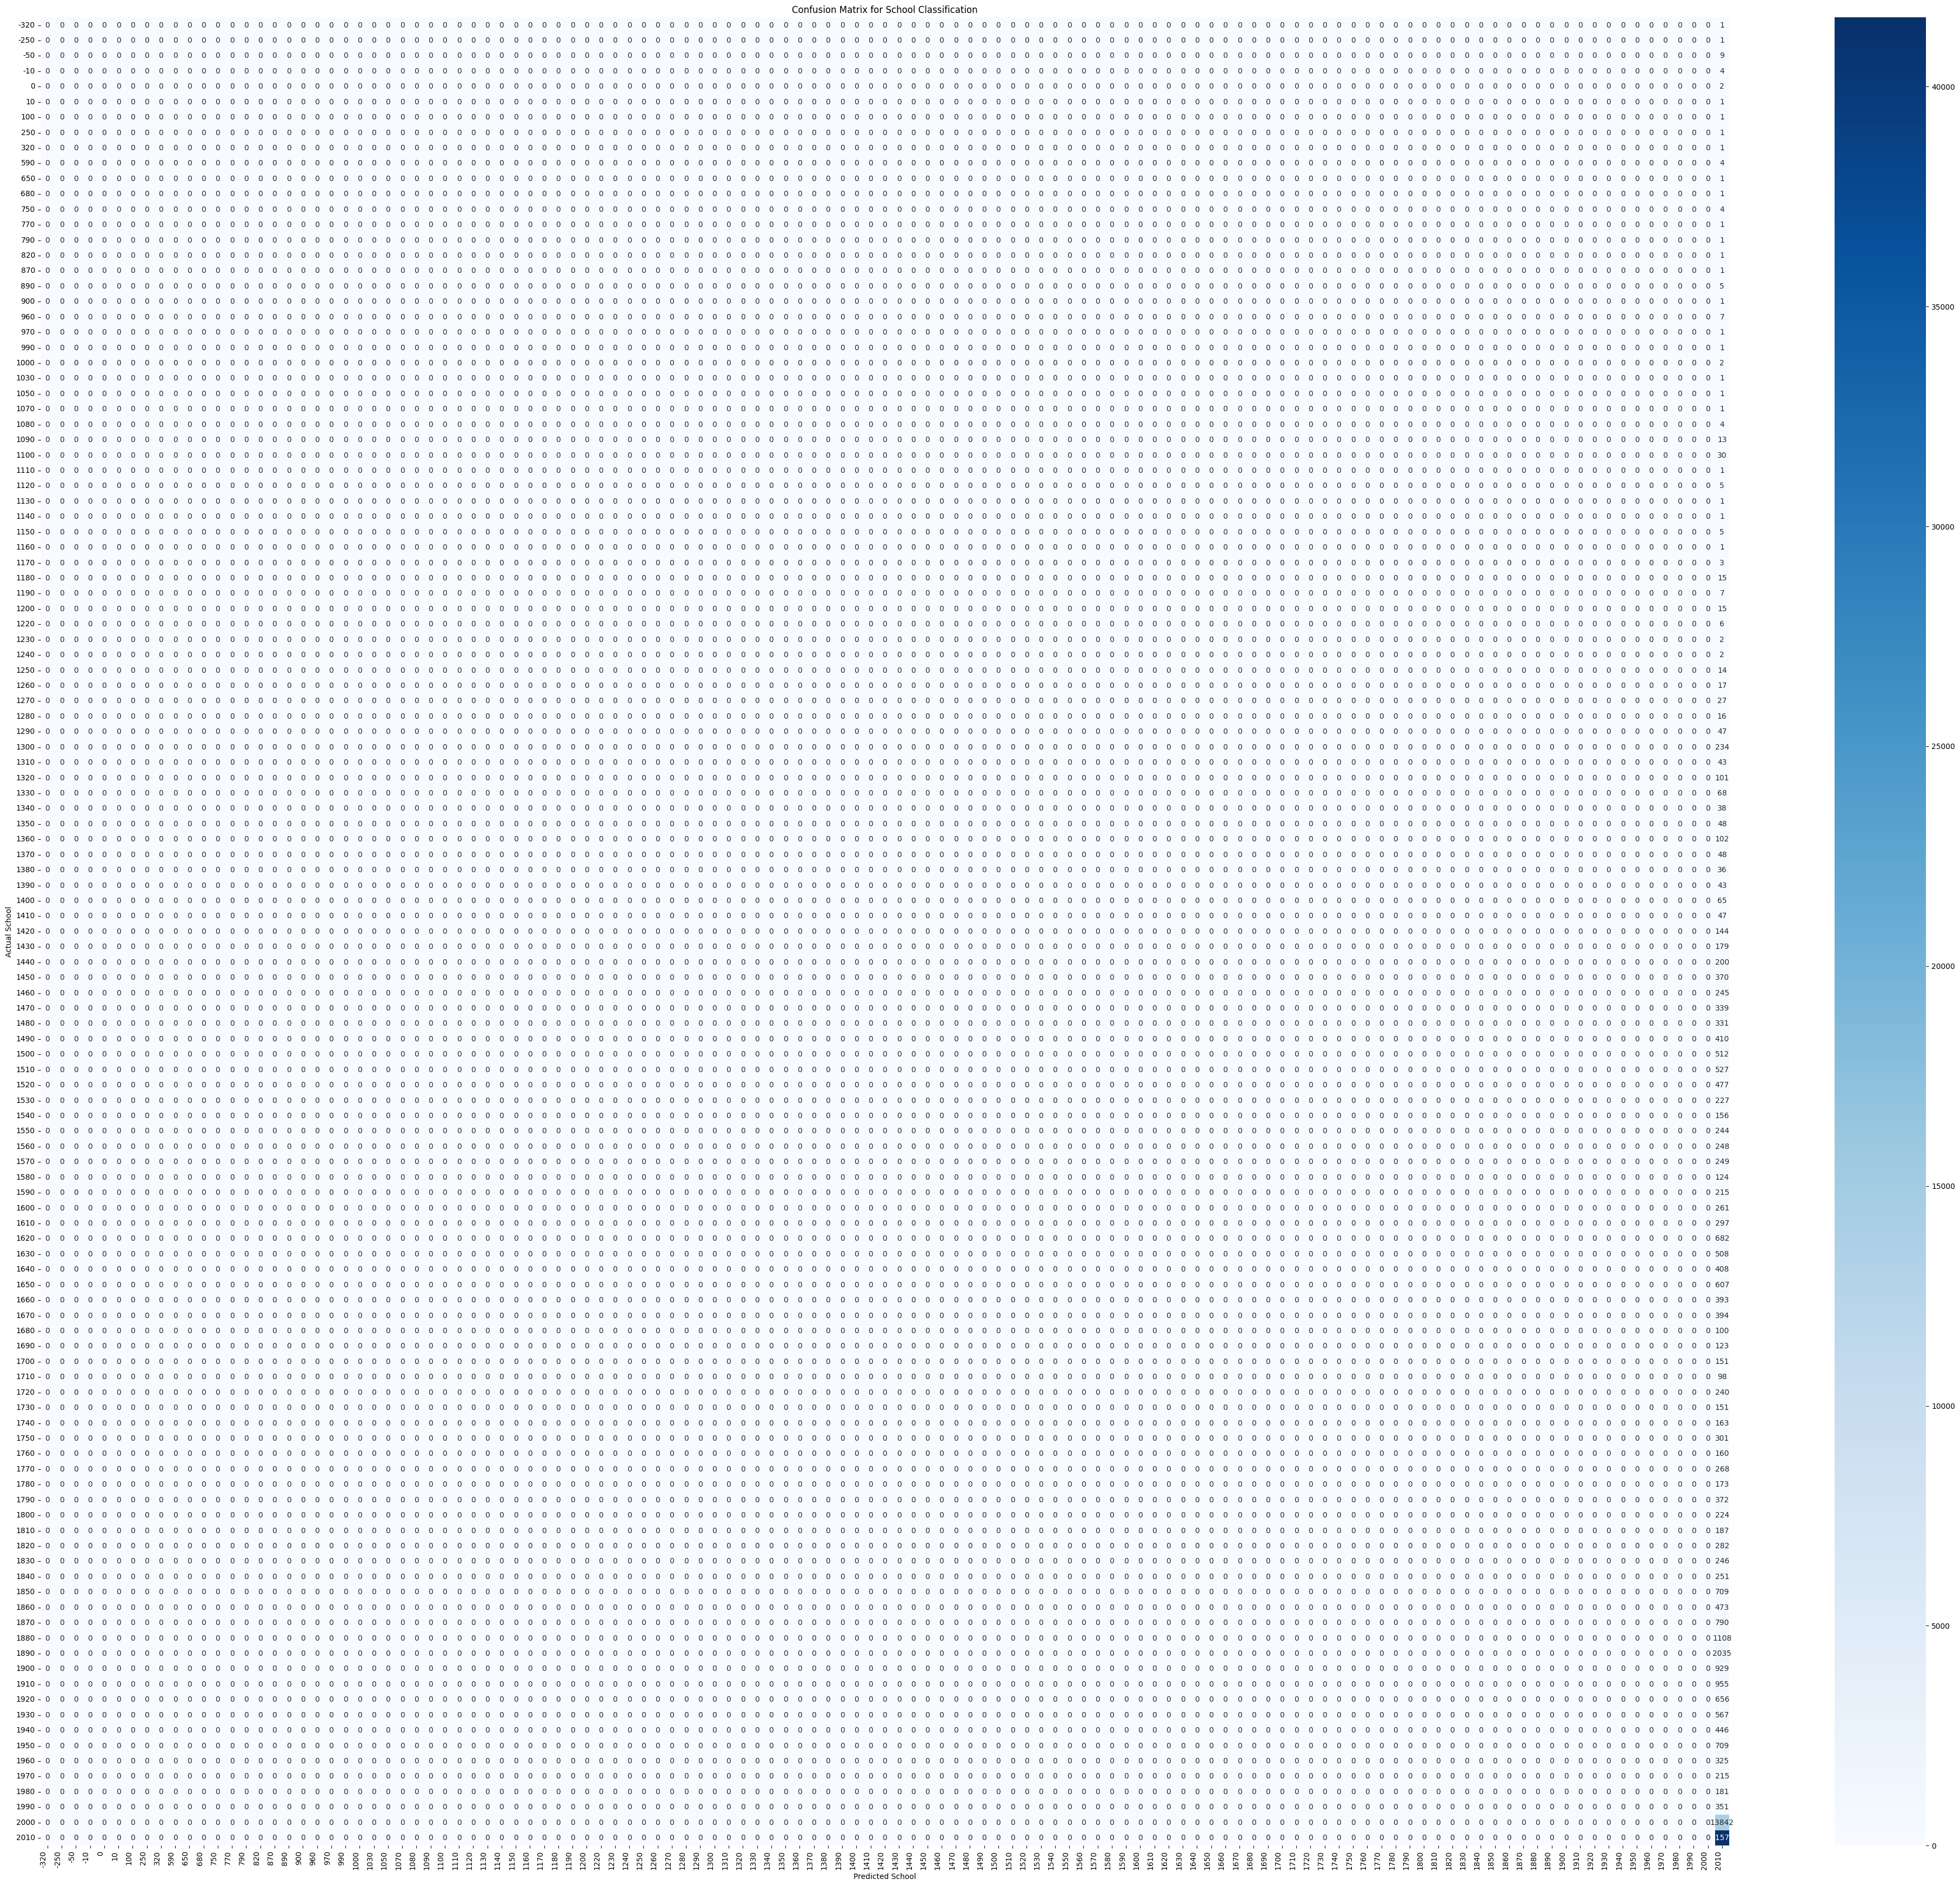

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

all_labels = clf.classes_

# Generate the confusion matrix for the school classifier
cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# Plotting the confusion matrix
plt.figure(figsize=(40, 35))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_labels, yticklabels=all_labels)
plt.title('Confusion Matrix for School Classification')
plt.ylabel('Actual School')
plt.xlabel('Predicted School')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

**4.2 Feature importance**

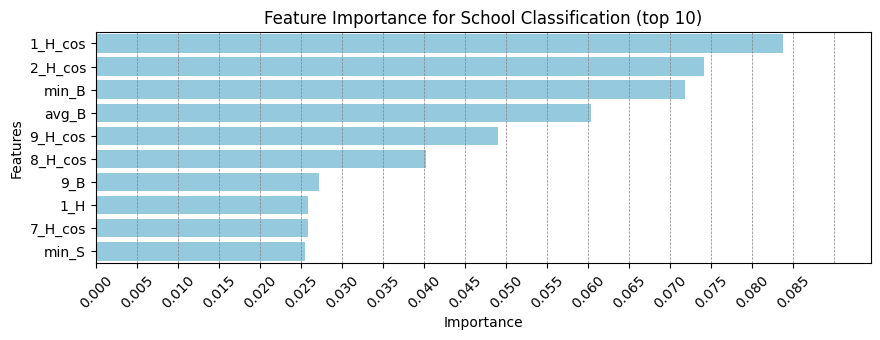

In [18]:
# For the school classifier (with balanced weights)
feature_importances_s = pd.DataFrame(clf.feature_importances_, 
                                     index = feature_columns, columns=['importance']
                                     ).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 3))
sns.barplot(x=feature_importances_s.importance, y=feature_importances_s.index, color='skyblue')

max_val = feature_importances_s.importance.max()
for x in np.arange(0, max_val + 0.01, 0.005):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
x_ticks = np.arange(0, round(max_val + 0.01, 2), 0.005)
plt.xticks(x_ticks, [f'{tick:.3f}' for tick in x_ticks], rotation=45)
plt.title('Feature Importance for School Classification (top 10)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()